# News Title Classification

## Importing The Libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [2]:
#Importing dataset
news_title = pd.read_excel('drive/My Drive/News Title.xls')
news_title.head()

,No,News Title,Category
0,1,Google+ rolls out 'Stories' for tricked out ph...,Technology
1,2,Dov Charney's Redeeming Quality,Business
2,3,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,4,"Google shows off Androids for wearables, cars,...",Technology
4,5,China May new bank loans at 870.8 bln yuan,Business


# Exploratory Data Analysis

In [3]:
#Checking Missing Values
news_title.isnull().sum()

No            0
News Title    0
Category      0
dtype: int64

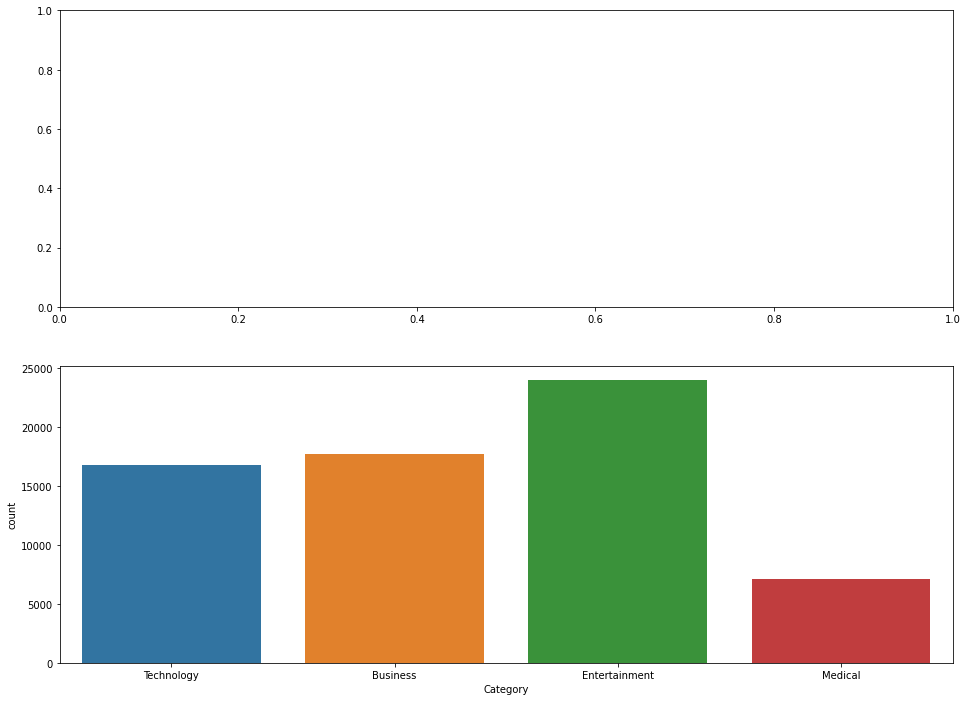

In [4]:
#Plotting graph for category column
fig, axs = plt.subplots(2, 1, figsize=(16,12))
sns.countplot(x='Category', data=news_title, ax=axs[1])

# Cleaning The Texts

In [5]:
#Cleaning Data
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range (0, 65535):
  title = re.sub('[^a-zA-Z]', ' ', news_title['News Title'][i])
  title = title.lower()
  title = title.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  title = [ps.stem(word) for word in title if not word in set(all_stopwords)]
  title = ' '.join(title)
  corpus.append(title)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
print(corpus)

['googl roll stori trick photo playback', 'dov charney redeem qualiti', 'white god add un certain regard palm dog', 'googl show android wearabl car tv', 'china may new bank loan bln yuan', 'firefox window metro browser develop cancel mozilla', 'destini beta kick juli', 'appl googl motorola end legal battl', 'updat facebook q revenu grow percent rise mobil ad', 'selena gomez justin bieber spot record studio miami', 'titanfal gameplay basic releas date dlc everyth els need', 'angela bassett direct whitney houston biopic lifetim', 'german museum let talk van gogh regrown ear', 'iraq crisi fuel concern oil price', 'bc doctor ok quarantin ebola aid trip liberia', 'gm recal nearli chevrolet cruze fix air bag', 'local expert weigh climat chang', 'samsung reportedli explor acquir compani power siri', 'ghost stori coldplay hit billboard', 'hacker raid ebay access million record', 'peopl readi assum colin kaepernick someth terribl', 'sound us patent offic cancel redskin trademark registr', 'beyo

#Label Coding

In [7]:
category_codes = {
    'Business': 0,
    'Entertainment': 1,
    'Technology': 2,
    'Medical': 3,
}

In [8]:
# Category mapping
news_title['Category_Code'] = news_title['Category']
news_title = news_title.replace({'Category_Code':category_codes})
news_title

,No,News Title,Category,Category_Code
0,1,Google+ rolls out 'Stories' for tricked out ph...,Technology,2
1,2,Dov Charney's Redeeming Quality,Business,0
2,3,White God adds Un Certain Regard to the Palm Dog,Entertainment,1
3,4,"Google shows off Androids for wearables, cars,...",Technology,2
4,5,China May new bank loans at 870.8 bln yuan,Business,0
...,...,...,...,...
65530,65531,Xbox One Homebrew Will Likely Be a Reality in ...,Technology,2
65531,65532,Maker Recalls 1.9 Million Rear-Facing Infant S...,Technology,2
65532,65533,Watch first 'Ninja Turtles' trailer,Entertainment,1
65533,65534,23/05/2014Dogs triumph in Cannes as canine thr...,Entertainment,1


## Creating The Bag of Words Model

In [9]:
#The bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = news_title.iloc[:, -1].values

## Splitting The Dataset

In [10]:
len(corpus)

65535

In [11]:
#Splitting into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Naive Bayes

## Training Naive Bayes Model on Training Set Data

In [12]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predicting The Test Result

In [13]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 1]
 [1 1]
 ...
 [3 1]
 [0 0]
 [1 1]]


## Model Evaluation

In [14]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2146   32  249 1131]
 [ 141 3467  212  950]
 [ 368   31 2152  811]
 [  29   17   14 1357]]


In [15]:
# Test accuracy
print('The test accuracy is: ')
print(accuracy_score(y_test, y_pred))

The test accuracy is: 
0.6959639887083238


In [16]:
#Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.60      0.69      3558
           1       0.98      0.73      0.83      4770
           2       0.82      0.64      0.72      3362
           3       0.32      0.96      0.48      1417

    accuracy                           0.70     13107
   macro avg       0.73      0.73      0.68     13107
weighted avg       0.82      0.70      0.73     13107



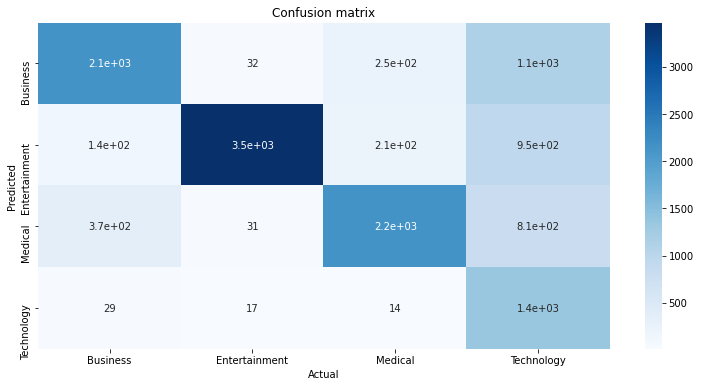

In [17]:
#Confusion Matrix Visualization
aux_news_title = news_title[['Category']].drop_duplicates().sort_values('Category')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(cm, 
            annot=True,
            xticklabels=aux_news_title['Category'].values, 
            yticklabels=aux_news_title['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

## Applying k-fold Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 69.54 %
Standard Deviation: 0.55 %


# Random Forest

## Training Model Using Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
random_forest_class = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
random_forest_class.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Predicting The Test Result

In [20]:
y_pred_random_forest = random_forest_class.predict(X_test)
print(np.concatenate((y_pred_random_forest.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 1]
 [1 1]
 ...
 [0 1]
 [0 0]
 [1 1]]


## Model Evaluation

In [21]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm_random = confusion_matrix(y_test, y_pred_random_forest)
print(cm_random)

[[2928  201  320  109]
 [ 206 4360  129   75]
 [ 299  239 2754   70]
 [ 149  143   66 1059]]


In [22]:
#Test accuracy
print("The test accuracy is: ")
accuracy_score(y_test, y_pred_random_forest)

The test accuracy is: 


0.8469520103761349

In [23]:
#Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred_random_forest))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3558
           1       0.88      0.91      0.90      4770
           2       0.84      0.82      0.83      3362
           3       0.81      0.75      0.78      1417

    accuracy                           0.85     13107
   macro avg       0.84      0.83      0.83     13107
weighted avg       0.85      0.85      0.85     13107



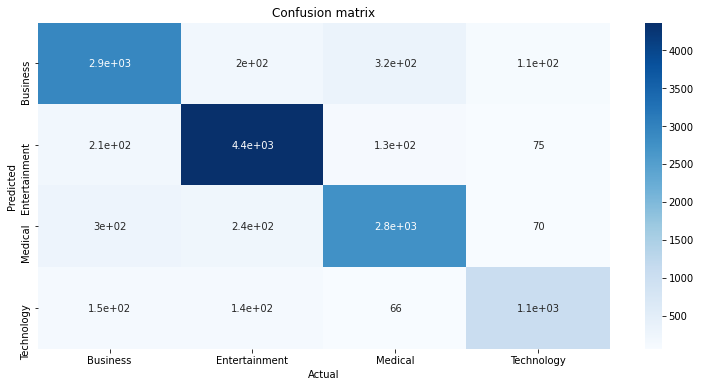

In [24]:
#Confusion Matrix Visualization
aux_news_title = news_title[['Category']].drop_duplicates().sort_values('Category')
cm_random = confusion_matrix(y_test, y_pred_random_forest)
plt.figure(figsize=(12.8,6))
sns.heatmap(cm_random, 
            annot=True,
            xticklabels=aux_news_title['Category'].values, 
            yticklabels=aux_news_title['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

## Applying k-fold Cross Validation

In [25]:
#Applying k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = random_forest_class, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.21 %
Standard Deviation: 0.50 %


# Decision Tree

## Training Decision Tree Model on Training set Data

In [26]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
decision_tree_class = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree_class.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Predicting The Test Result

In [27]:
y_pred_decisiontree = decision_tree_class.predict(X_test)
print(np.concatenate((y_pred_decisiontree.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [1 1]]


## Model Evaluation

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_dectree = confusion_matrix(y_test, y_pred_decisiontree)
print(cm_dectree)

[[2789  254  376  139]
 [ 261 4235  176   98]
 [ 359  276 2660   67]
 [ 166  174   77 1000]]


In [29]:
# Test accuracy
print("The test accuracy is: ")
accuracy_score(y_test, y_pred_decisiontree)

The test accuracy is: 


0.8151369497215228

In [30]:
#Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred_decisiontree))

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      3558
           1       0.86      0.89      0.87      4770
           2       0.81      0.79      0.80      3362
           3       0.77      0.71      0.74      1417

    accuracy                           0.82     13107
   macro avg       0.80      0.79      0.80     13107
weighted avg       0.81      0.82      0.81     13107



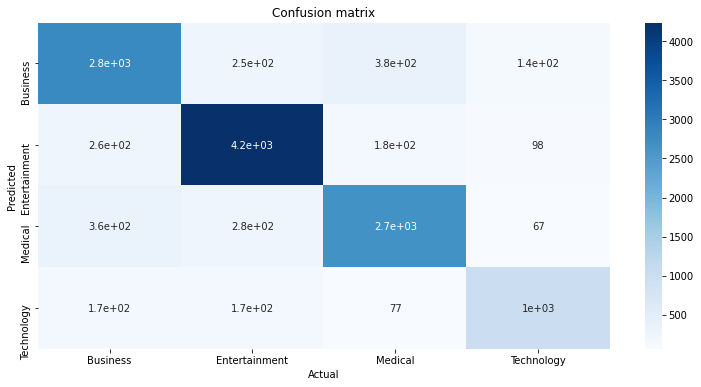

In [31]:
#Confusion Matrix Visualization
aux_news_title = news_title[['Category']].drop_duplicates().sort_values('Category')
plt.figure(figsize=(12.8,6))
sns.heatmap(cm_dectree, 
            annot=True,
            xticklabels=aux_news_title['Category'].values, 
            yticklabels=aux_news_title['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

## Applying k-fold Cross Validation

In [32]:
#Applying k-fold cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = decision_tree_class, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.87 %
Standard Deviation: 0.58 %


#Logistic Regression

## Training Logistic Regression Model on Training Set Data

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0, max_iter = 1000)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting The Test Result

In [34]:
y_pred_log = log_reg.predict(X_test)
print(np.concatenate((y_pred_log.reshape(len(y_pred_log),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [1 1]]


## Model Evaluation

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_log = confusion_matrix(y_test, y_pred_log)
print(cm_log)

[[2977  198  309   74]
 [ 161 4464   92   53]
 [ 335  217 2750   60]
 [ 147  121   53 1096]]


In [36]:
# Test accuracy
print("The test accuracy is: ")
accuracy_score(y_test, y_pred_log)

The test accuracy is: 


0.8611429007400626

In [37]:
#Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred_log))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      3558
           1       0.89      0.94      0.91      4770
           2       0.86      0.82      0.84      3362
           3       0.85      0.77      0.81      1417

    accuracy                           0.86     13107
   macro avg       0.86      0.84      0.85     13107
weighted avg       0.86      0.86      0.86     13107



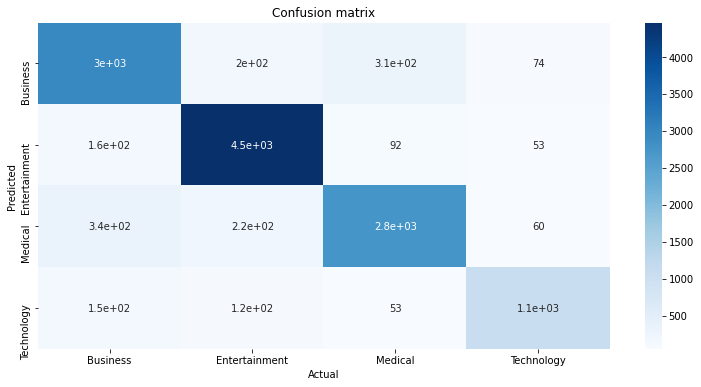

In [38]:
#Confusion Matrix Visualization
aux_news_title = news_title[['Category']].drop_duplicates().sort_values('Category')
plt.figure(figsize=(12.8,6))
sns.heatmap(cm_log, 
            annot=True,
            xticklabels=aux_news_title['Category'].values, 
            yticklabels=aux_news_title['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

##Applying k-fold Cross Validation

In [39]:
#Applying k-fold cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = log_reg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 86.10 %
Standard Deviation: 0.33 %
